# Amazon

- This dataset allows us to visualize the evolution of sales across different Amazon Stores from the end of 2018 to the year 2021.
- These stores are located in the UK.
- The information contained focuses primarily on store characteristics (type, ID, size) and contextual variables (temperature, fuel prices, unemployment rates, price levels).
- A significant portion of the time window covered here falls during the COVID period. It will be interesting to see if COVID and its consequences had an impact on sales.
- The objective is to predict the weekly sales level for each Amazon store, in order to better guide stock deliveries and obtain an initial estimate of revenue.

## Imports

In [362]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf
from statsmodels.tsa.seasonal import seasonal_decompose
import matplotlib.dates as mdates
%matplotlib inline
from scipy.signal import find_peaks
from statsmodels.tsa.stattools import adfuller

In [363]:
df = pd.read_csv('amazon_sales_dataset.csv',sep=',')

In [364]:
df.columns

Index(['Date', 'Store', 'Dept', 'Unnamed: 3', 'Weekly_Sales', 'Type', 'Size',
       'Temperature', 'Fuel_Price', 'CPI', 'Unemployment', 'IsHoliday', 'Year',
       'Month', 'Week', 'max', 'min', 'mean', 'median', 'std',
       'Total_MarkDown'],
      dtype='object')

In [365]:
df.head()

,Date,Store,Dept,Unnamed: 3,Weekly_Sales,Type,Size,Temperature,Fuel_Price,CPI,...,IsHoliday,Year,Month,Week,max,min,mean,median,std,Total_MarkDown
0,05/02/2019,1,1,05/02/2019,24924.50,A,151315,42.31,2.572,211.096358,...,0,2019,2,5,57592.12,14537.37,22513.322940,18535.48,9854.349032,0.0
1,05/02/2019,9,97,05/02/2019,668.48,B,125833,38.01,2.572,214.655459,...,0,2019,2,5,766.93,-9.92,372.655556,371.05,290.954675,0.0
2,05/02/2019,9,85,05/02/2019,693.87,B,125833,38.01,2.572,214.655459,...,0,2019,2,5,2512.14,110.56,876.629441,824.04,307.436056,0.0
3,05/02/2019,8,80,05/02/2019,8654.60,A,155078,34.14,2.572,214.471451,...,0,2019,2,5,11990.43,7414.43,9188.915105,9161.97,756.223236,0.0
4,05/02/2019,9,55,05/02/2019,11123.56,B,125833,38.01,2.572,214.655459,...,0,2019,2,5,29166.26,4791.74,8607.050490,7571.60,3874.176095,0.0


## Keep Relevant Columns

In [366]:
to_keep=['Date','Store','Dept','Weekly_Sales','Type',
         'Size','Temperature','Fuel_Price','CPI','Unemployment',
         'IsHoliday','Year','Month','Week']

In [367]:
df = df[to_keep]

In [368]:
df.head()

,Date,Store,Dept,Weekly_Sales,Type,Size,Temperature,Fuel_Price,CPI,Unemployment,IsHoliday,Year,Month,Week
0,05/02/2019,1,1,24924.50,A,151315,42.31,2.572,211.096358,8.106,0,2019,2,5
1,05/02/2019,9,97,668.48,B,125833,38.01,2.572,214.655459,6.415,0,2019,2,5
2,05/02/2019,9,85,693.87,B,125833,38.01,2.572,214.655459,6.415,0,2019,2,5
3,05/02/2019,8,80,8654.60,A,155078,34.14,2.572,214.471451,6.299,0,2019,2,5
4,05/02/2019,9,55,11123.56,B,125833,38.01,2.572,214.655459,6.415,0,2019,2,5


## Check Data Quality

In [369]:
df.isnull().sum()

Date            0
Store           0
Dept            0
Weekly_Sales    0
Type            0
Size            0
Temperature     0
Fuel_Price      0
CPI             0
Unemployment    0
IsHoliday       0
Year            0
Month           0
Week            0
dtype: int64

In [370]:
df.dtypes

Date             object
Store             int64
Dept              int64
Weekly_Sales    float64
Type             object
Size              int64
Temperature     float64
Fuel_Price      float64
CPI             float64
Unemployment    float64
IsHoliday         int64
Year              int64
Month             int64
Week              int64
dtype: object

### Datetime

In [371]:
df['Date'] = pd.to_datetime(df['Date'], dayfirst=True)

## EDA

In [372]:
df.head()

,Date,Store,Dept,Weekly_Sales,Type,Size,Temperature,Fuel_Price,CPI,Unemployment,IsHoliday,Year,Month,Week
0,2019-02-05,1,1,24924.50,A,151315,42.31,2.572,211.096358,8.106,0,2019,2,5
1,2019-02-05,9,97,668.48,B,125833,38.01,2.572,214.655459,6.415,0,2019,2,5
2,2019-02-05,9,85,693.87,B,125833,38.01,2.572,214.655459,6.415,0,2019,2,5
3,2019-02-05,8,80,8654.60,A,155078,34.14,2.572,214.471451,6.299,0,2019,2,5
4,2019-02-05,9,55,11123.56,B,125833,38.01,2.572,214.655459,6.415,0,2019,2,5


## Evolution of Sales

A Date value represents a week. 

We will group by Date to estimate the sales week after week, from the beginning of the period to the end.

### Sales by week

In [373]:
sales_by_week = df.groupby('Date')['Weekly_Sales'].sum()

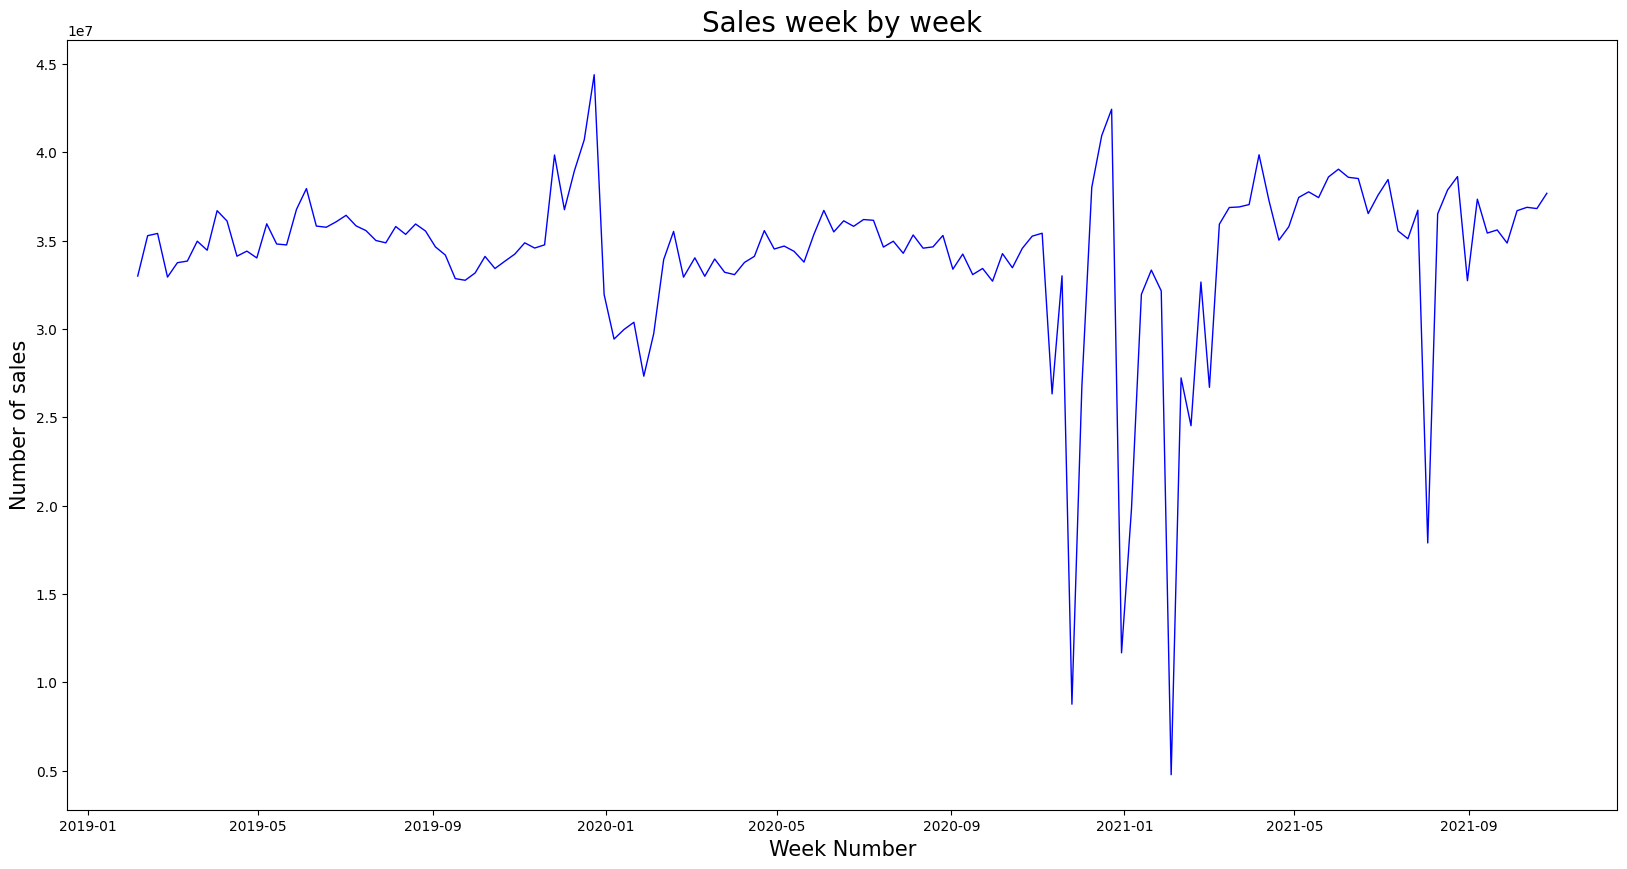

In [374]:
plt.figure(figsize=(20,10))

plt.plot(
    sales_by_week,
    color="b",
    linestyle='-',
    linewidth=1,
)

plt.title("Sales week by week", fontsize=20)
plt.xlabel("Week Number", fontsize=15)
plt.ylabel("Number of sales", fontsize=15)

plt.show()

Until the end of 2019, the trend is stable before a sharp increase (perhaps around Christmas 2019?), followed by a decline and a return to a constant level in 2020 (suggesting that COVID might not have had an effect?). 

At the end of 2020 and the beginning of 2021, sales experience significant fluctuations: a sharp drop followed by several returns to equilibrium. 

The situation seems to stabilize from the spring of 2021 (possibly due to the end of health restrictions and widespread vaccination of the British population?).

### How sales change week after week ?

In [375]:
weekly_sales_evolution = sales_by_week.diff()

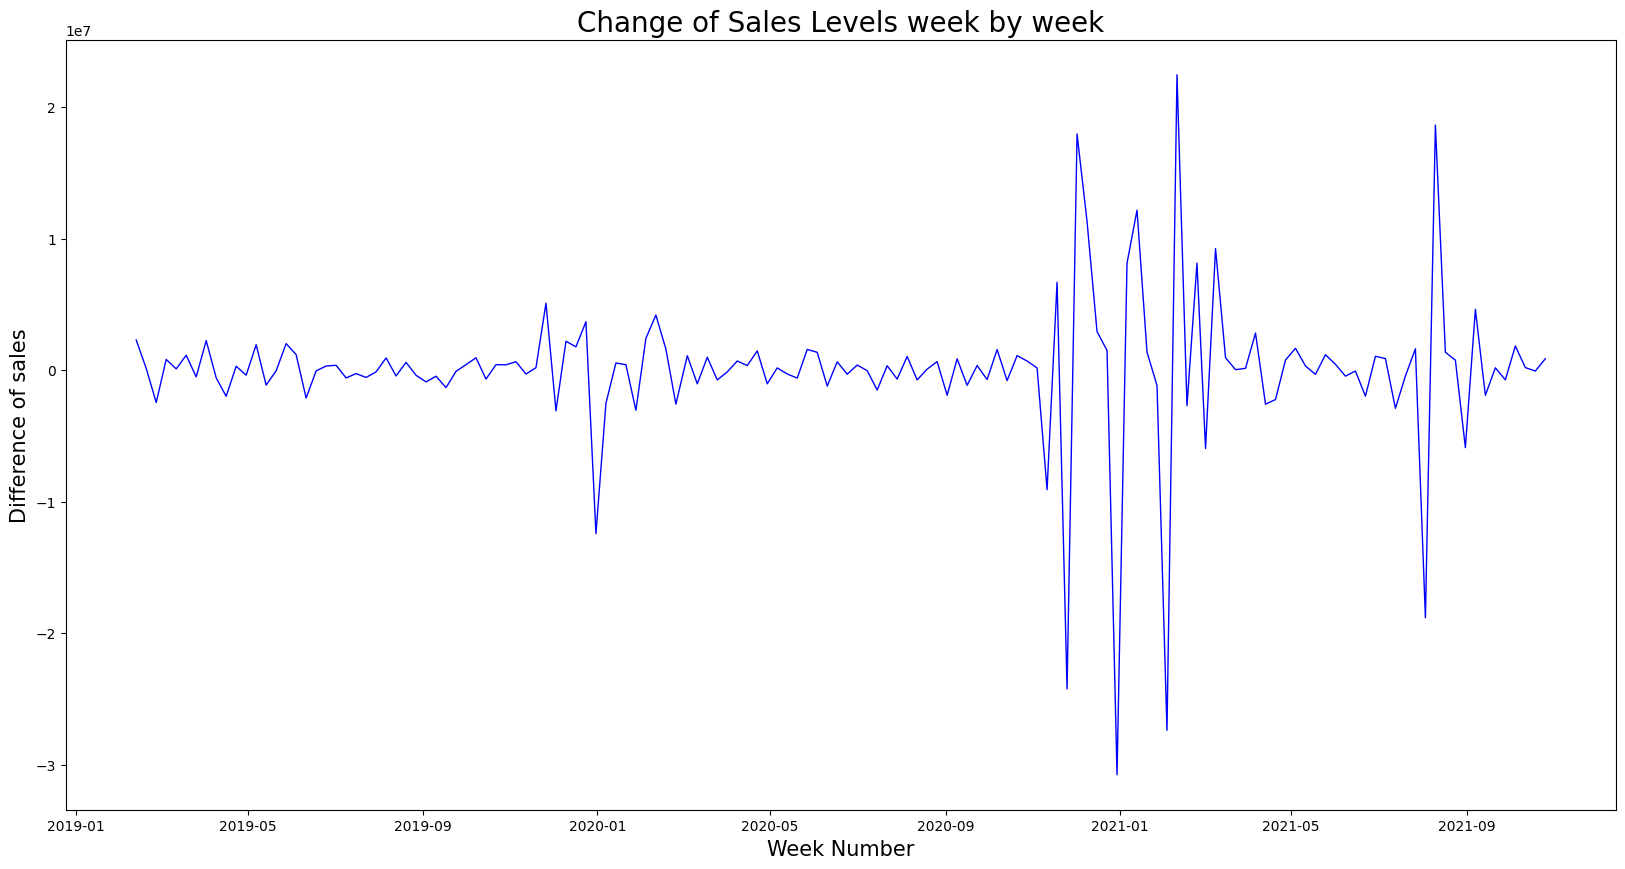

In [376]:
plt.figure(figsize=(20,10))

plt.plot(
    weekly_sales_evolution,
    color="b",
    linestyle='-',
    linewidth=1,
)

plt.title("Change of Sales Levels week by week", fontsize=20)
plt.xlabel("Week Number", fontsize=15)
plt.ylabel("Difference of sales", fontsize=15)

plt.show()

### Joint Evolution of indicators

#### Weekly Sales and Fuel prices

In [377]:
#Average Weekly Fuel Price
avg_weekly_fuel_price = df.groupby('Date')['Fuel_Price'].mean()

In [378]:
#Create two dataframes, one for fuel prices and the other one for weekly sales
avg_weekly_fuel_price = pd.DataFrame(avg_weekly_fuel_price).reset_index()
sales_by_week = pd.DataFrame(sales_by_week).reset_index()

In [379]:
avg_weekly_fuel_price = avg_weekly_fuel_price.rename(columns={'Date':'Week'})
sales_by_week = sales_by_week.rename(columns={'Date':'Week'})

In [380]:
#Merge to directly compare fuel prices and weekly sales
sales_vs_fuel = sales_by_week.merge(avg_weekly_fuel_price,on="Week",how="inner")

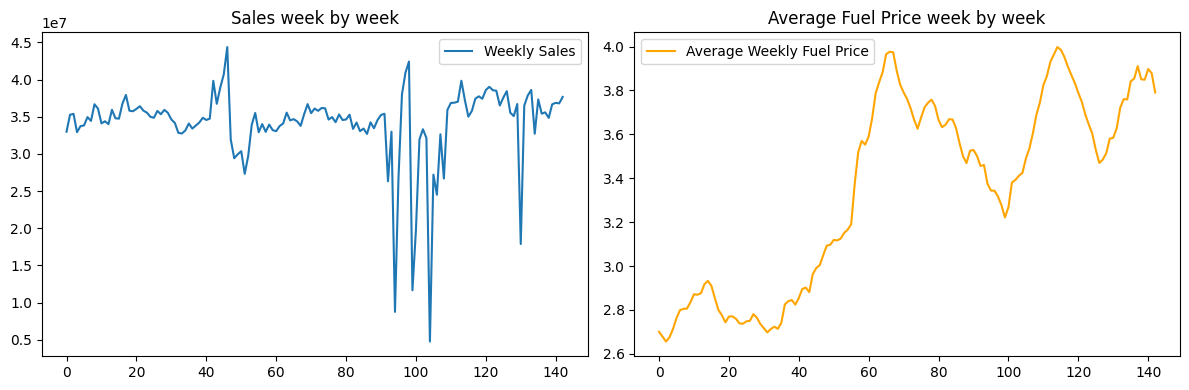

In [381]:
#Plot sales vs fuel prices
fig, axes = plt.subplots(1, 2, figsize=(12, 4))

axes[0].plot(sales_vs_fuel['Weekly_Sales'], label='Weekly Sales')
axes[0].set_title('Sales week by week')
axes[0].legend()

axes[1].plot(sales_vs_fuel['Fuel_Price'], label='Average Weekly Fuel Price', color='orange')
axes[1].set_title('Average Fuel Price week by week')
axes[1].legend()

# Adjust layout
plt.tight_layout()
plt.show()

In [382]:
sales_vs_fuel.corr()

,Week,Weekly_Sales,Fuel_Price
Week,1.000000,-0.046294,0.830501
Weekly_Sales,-0.046294,1.000000,0.043565
Fuel_Price,0.830501,0.043565,1.000000


The correlation is almost non-existent.

Even when the fuel price is high, people stil need to go to the stores to boy groceries.

#### Weekly Sales and CPI

In [383]:
#Average Weekly Sales vs Fuel Price
avg_weekly_CPI = df.groupby('Date')['CPI'].mean()

In [384]:
#Create a dataframe for average CPI (Consumer Price Index)
avg_weekly_CPI = pd.DataFrame(avg_weekly_CPI).reset_index()

In [385]:
avg_weekly_CPI = avg_weekly_CPI.rename(columns={'Date':'Week'})

In [386]:
#Merge to directly compare CPI and weekly sales
sales_vs_CPI = sales_by_week.merge(avg_weekly_CPI,on="Week",how="inner")

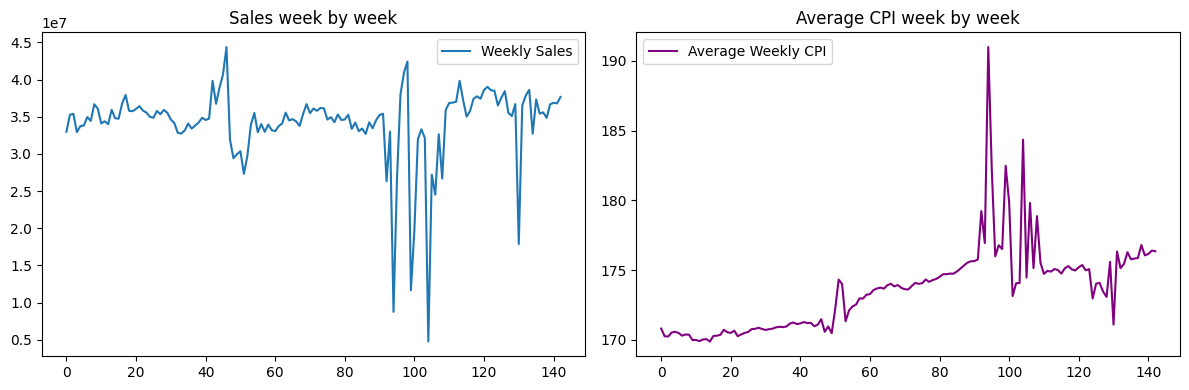

In [387]:
#Plot sales vs CPI
fig, axes = plt.subplots(1, 2, figsize=(12, 4))

axes[0].plot(sales_vs_CPI['Weekly_Sales'], label='Weekly Sales')
axes[0].set_title('Sales week by week')
axes[0].legend()

axes[1].plot(sales_vs_CPI['CPI'], label='Average Weekly CPI', color='purple')
axes[1].set_title('Average CPI week by week')
axes[1].legend()

# Adjust layout
plt.tight_layout()
plt.show()

In [388]:
sales_vs_CPI.corr()

,Week,Weekly_Sales,CPI
Week,1.000000,-0.046294,0.698605
Weekly_Sales,-0.046294,1.000000,-0.514628
CPI,0.698605,-0.514628,1.000000


A negative correlation exists between Weekly Sales and CPI.

An increase in the level of price would affect negatively the consumption, which is not surprising.

#### Weekly Sales and Unemployment

In [389]:
#Average Weekly Sales vs Unemployment
avg_weekly_unemployment = df.groupby('Date')['Unemployment'].mean()

In [390]:
#Create a dataframe for Unemployment
avg_weekly_unemployment = pd.DataFrame(avg_weekly_unemployment).reset_index()

In [391]:
avg_weekly_unemployment = avg_weekly_unemployment.rename(columns={'Date':'Week'})

In [392]:
#Merge to directly compare Unemployment and weekly sales
sales_vs_unemployment = sales_by_week.merge(avg_weekly_unemployment,on="Week",how="inner")

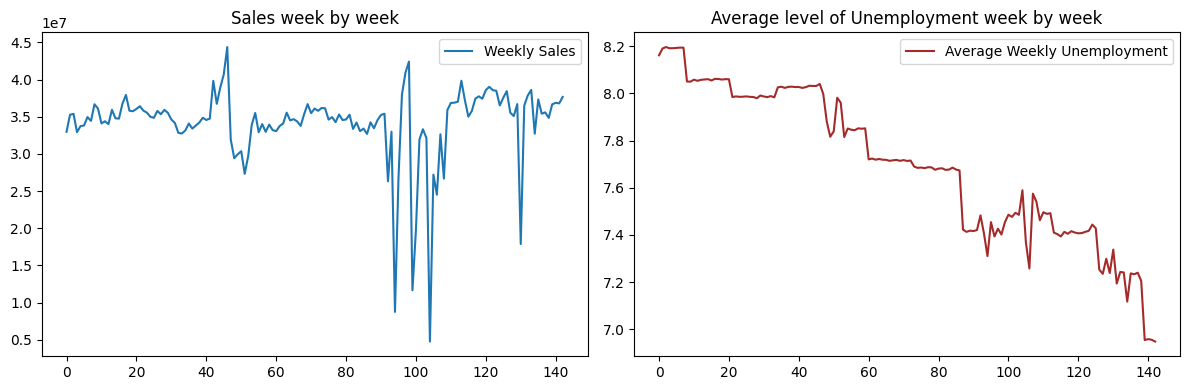

In [393]:
#Plot sales vs Unemployment
fig, axes = plt.subplots(1, 2, figsize=(12, 4))

axes[0].plot(sales_vs_unemployment['Weekly_Sales'], label='Weekly Sales')
axes[0].set_title('Sales week by week')
axes[0].legend()

axes[1].plot(sales_vs_unemployment['Unemployment'], label='Average Weekly Unemployment', color='brown')
axes[1].set_title('Average level of Unemployment week by week')
axes[1].legend()

# Adjust layout
plt.tight_layout()
plt.show()

In [394]:
sales_vs_unemployment.corr()

,Week,Weekly_Sales,Unemployment
Week,1.000000,-0.046294,-0.964323
Weekly_Sales,-0.046294,1.000000,0.058506
Unemployment,-0.964323,0.058506,1.000000


The correlation is also almost non-existent.

More unemployment will not change the people's needs to consume groceries.

### Summary of the correlations

In [395]:
#Calculate correlations of sales with all th indicators
corr_sales_fuel = sales_vs_fuel['Weekly_Sales'].corr(sales_vs_fuel['Fuel_Price'])
corr_sales_CPI = sales_vs_CPI['Weekly_Sales'].corr(sales_vs_CPI['CPI'])
corr_sales_unemployment = sales_vs_unemployment['Weekly_Sales'].corr(sales_vs_unemployment['Unemployment'])

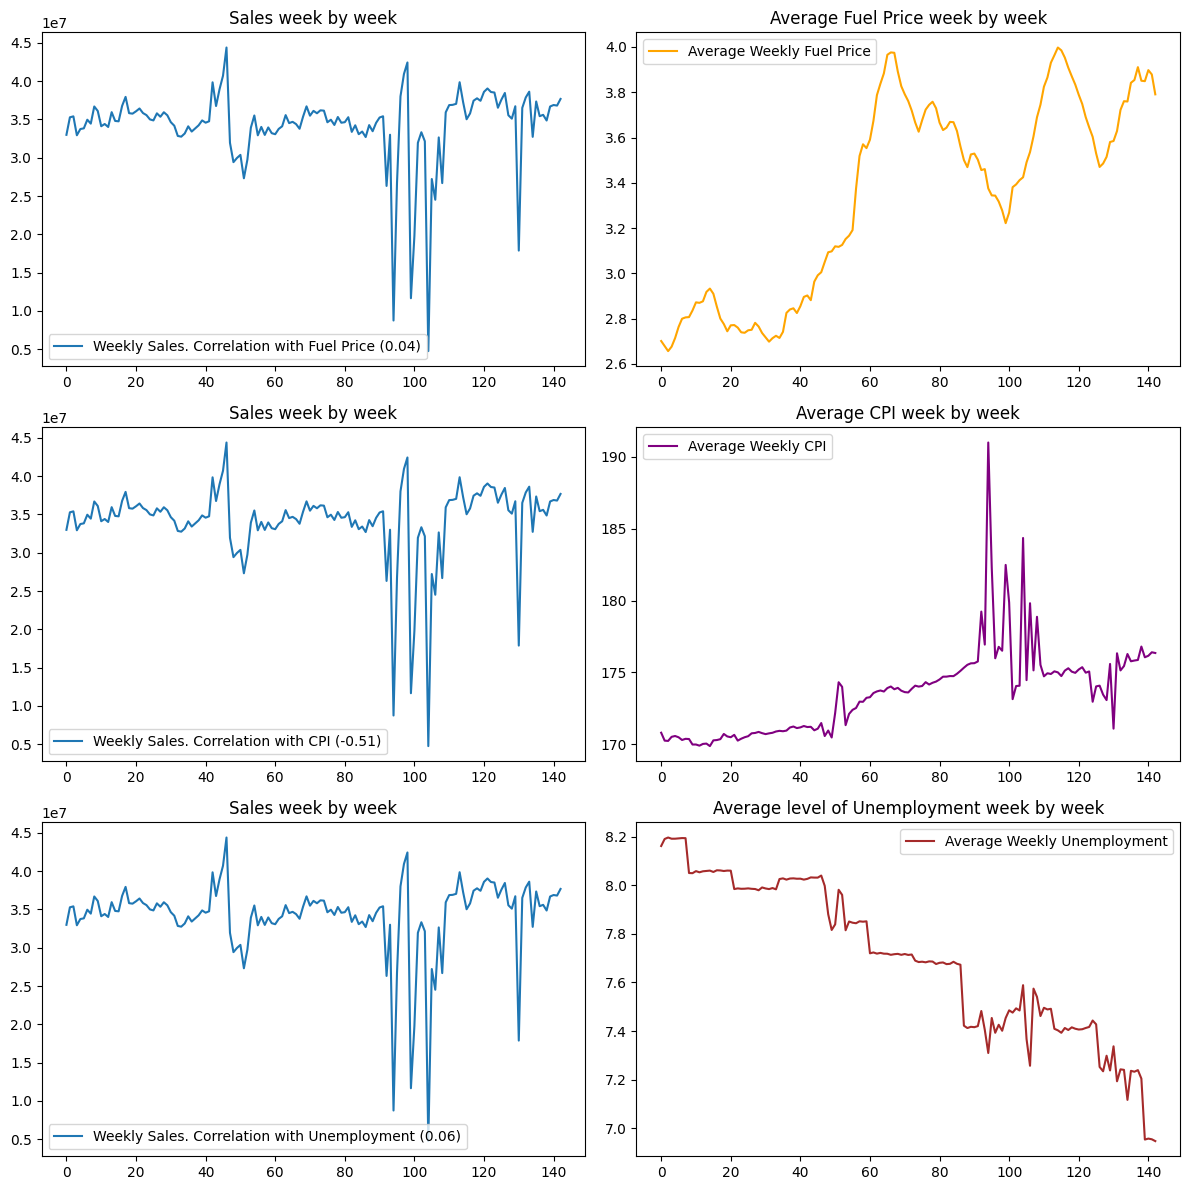

In [396]:
#Plot a summary of the previous figures
fig, axes = plt.subplots(3, 2, figsize=(12,12))

axes[0,0].plot(sales_vs_fuel['Weekly_Sales'], label=f'Weekly Sales. Correlation with Fuel Price ({corr_sales_fuel:.2f})')
axes[0,0].set_title('Sales week by week')
axes[0,0].legend()

axes[0,1].plot(sales_vs_fuel['Fuel_Price'], label='Average Weekly Fuel Price', color='orange')
axes[0,1].set_title('Average Fuel Price week by week')
axes[0,1].legend()

axes[1,0].plot(sales_vs_CPI['Weekly_Sales'], label=f'Weekly Sales. Correlation with CPI ({corr_sales_CPI:.2f})')
axes[1,0].set_title('Sales week by week')
axes[1,0].legend()

axes[1,1].plot(sales_vs_CPI['CPI'], label='Average Weekly CPI', color='purple')
axes[1,1].set_title('Average CPI week by week')
axes[1,1].legend()

axes[2,0].plot(sales_vs_unemployment['Weekly_Sales'], label=f'Weekly Sales. Correlation with Unemployment ({corr_sales_unemployment:.2f})')
axes[2,0].set_title('Sales week by week')
axes[2,0].legend()

axes[2,1].plot(sales_vs_unemployment['Unemployment'], label='Average Weekly Unemployment', color='brown')
axes[2,1].set_title('Average level of Unemployment week by week')
axes[2,1].legend()

# Adjust layout
plt.tight_layout()
plt.show()

## Autocorrelation

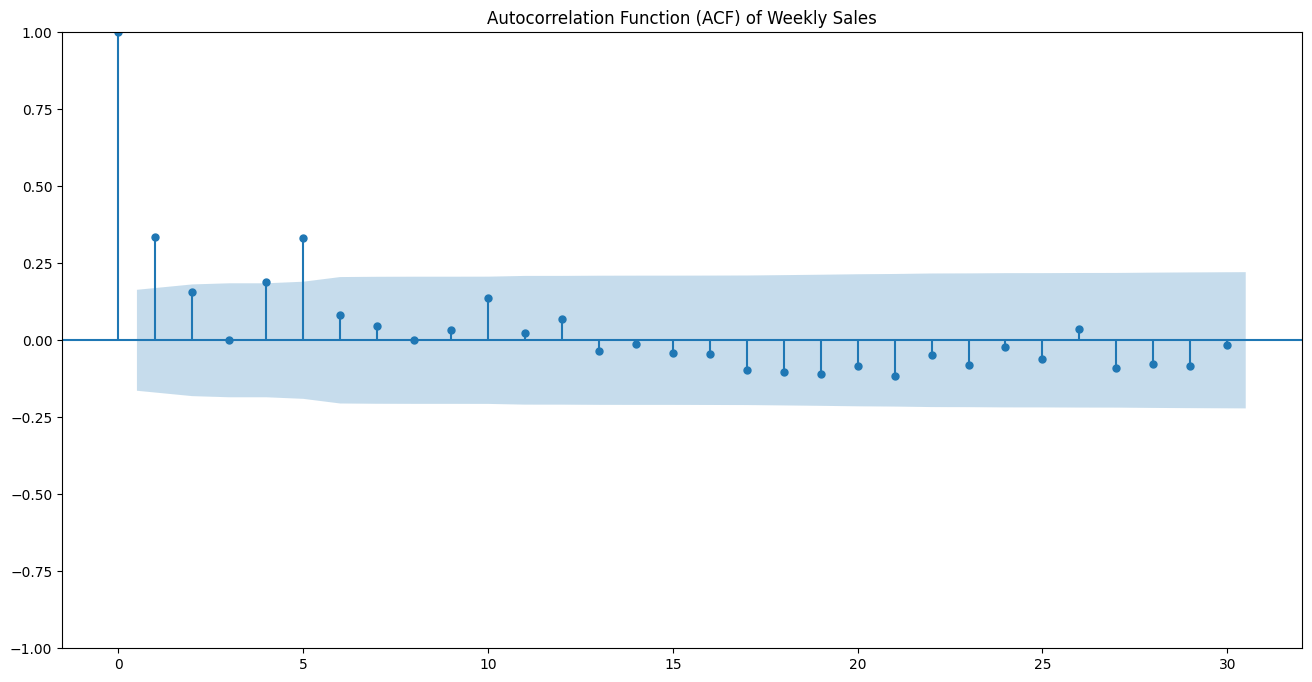

In [397]:
plt.figure(figsize=(16, 8))
plot_acf(sales_by_week['Weekly_Sales'], lags=30, ax=plt.gca())
plt.title('Autocorrelation Function (ACF) of Weekly Sales')
plt.show()

Looks like we have 3 significant peaks, which could be analyzed.

## Partial Autocorrelation

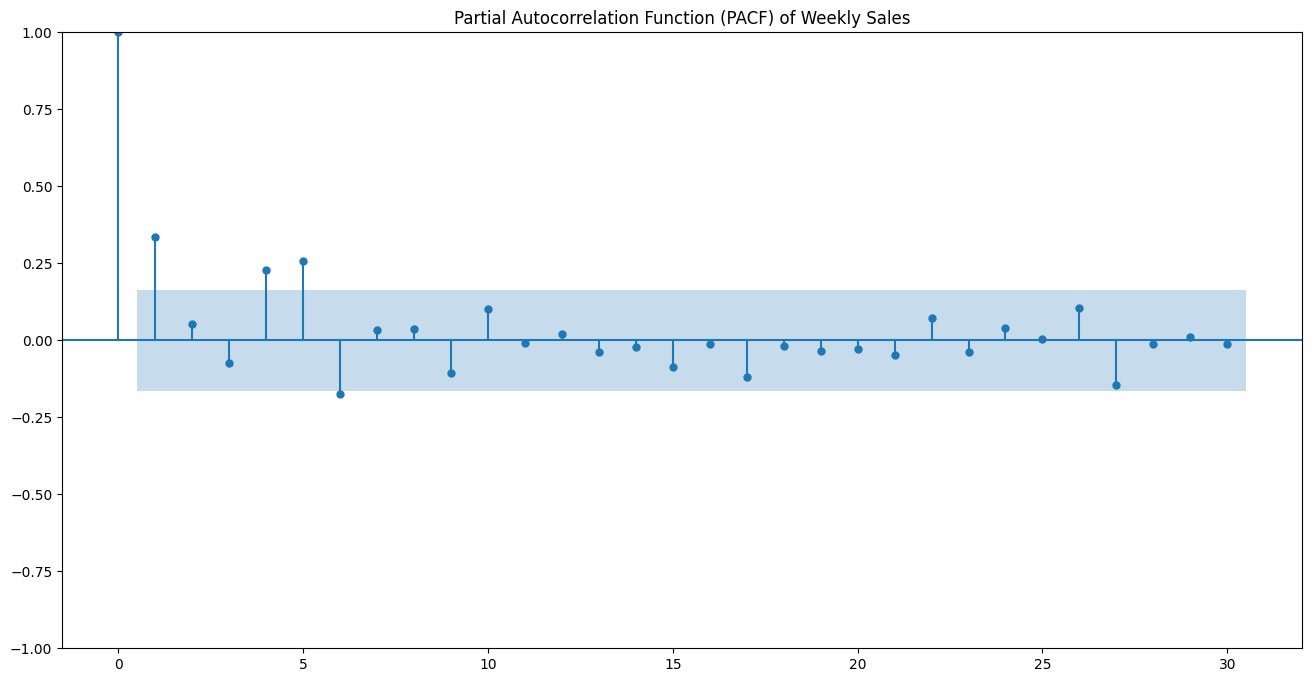

In [398]:
plt.figure(figsize=(16, 8))
plot_pacf(sales_by_week['Weekly_Sales'], lags=30, ax=plt.gca(), method='ywm')
plt.title('Partial Autocorrelation Function (PACF) of Weekly Sales')
plt.show()

Even without the intermediate lags, we still have 3 significant peaks.

## Additive Decomposition

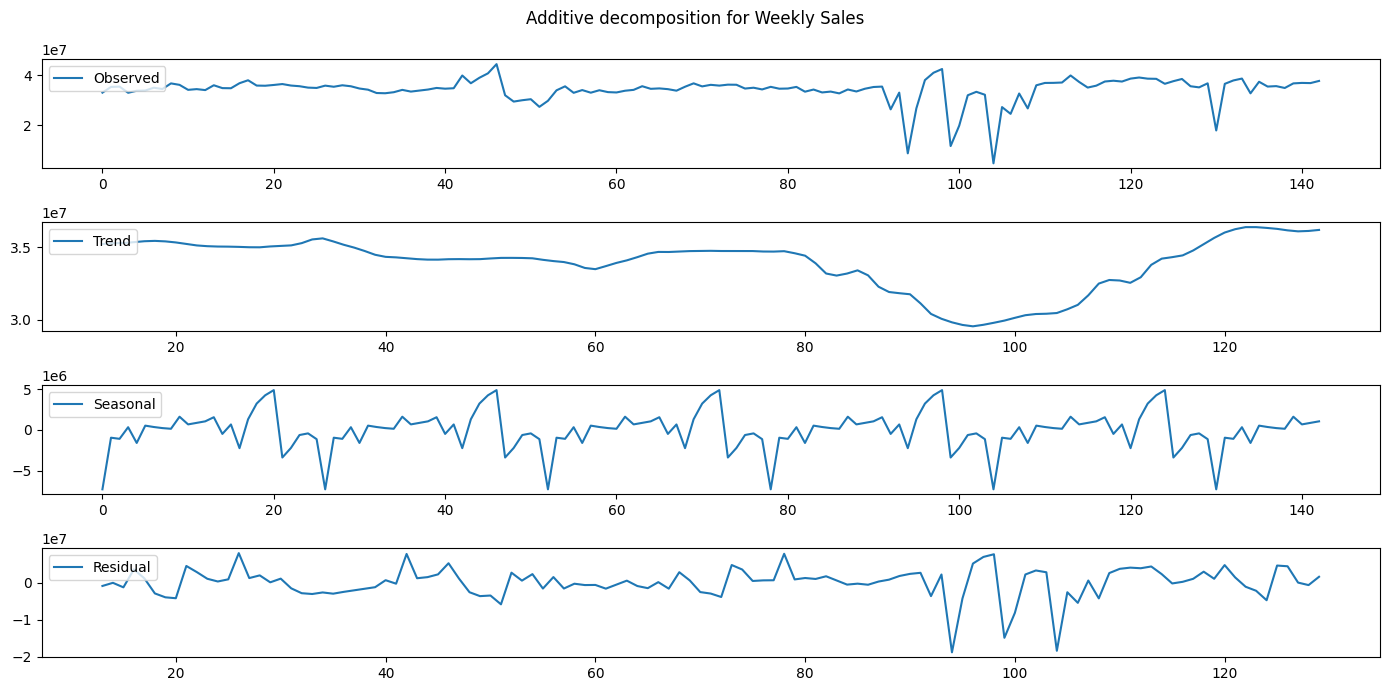

In [399]:
# Time Series Decomposition
decomposition = seasonal_decompose(sales_by_week['Weekly_Sales'], model='additive', period=26)  # Ajuste la période à 52

# Plot Decomposition
plt.figure(figsize=(14, 7))
plt.suptitle('Additive decomposition for Weekly Sales')

# Observed
plt.subplot(411)
plt.plot(decomposition.observed, label='Observed')
plt.legend(loc='upper left')

# Trend
plt.subplot(412)
plt.plot(decomposition.trend, label='Trend')
plt.legend(loc='upper left')

# Seasonal
plt.subplot(413)
plt.plot(decomposition.seasonal, label='Seasonal')
plt.legend(loc='upper left')

# Residual
plt.subplot(414)
plt.plot(decomposition.resid, label='Residual')
plt.legend(loc='upper left')

plt.tight_layout()
plt.show()

- The level of sales remains constant for the first 80 weeks, before decreasing for 20 weeks and then rising again.

- There is seasonality with a regular peak and a regular sharp drop.

- A residual exists and seems to vary around week 100.

## What happened between weeks 80 and 100?

In [400]:
sales_by_week.iloc[80]

Week            2020-08-19 00:00:00
Weekly_Sales            34642050.99
Name: 80, dtype: object

In [401]:
sales_by_week.iloc[90]

Week            2020-10-28 00:00:00
Weekly_Sales            35249638.04
Name: 90, dtype: object

In [402]:
sales_by_week.iloc[100]

Week            2021-01-06 00:00:00
Weekly_Sales            19790600.75
Name: 100, dtype: object

It's hard to link this sharp drop in the trend with Covid.

We can still assume the second lockdown, started in October 2020 (week 90) may have affected the level of sales.

## What are the peaks we see on Seasonality?

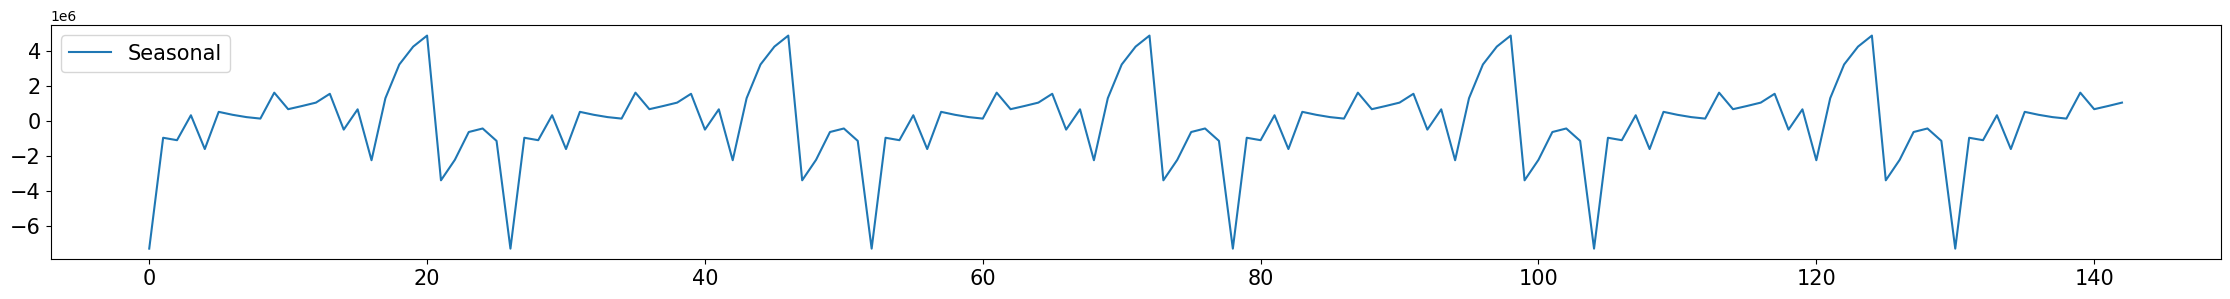

In [403]:
plt.figure(figsize=(28, 14))

plt.subplot(413)
plt.plot(decomposition.seasonal, label='Seasonal')

plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.legend(loc='upper left',fontsize=15)

In [404]:
# Get peaks
all_peaks, _ = find_peaks(decomposition.seasonal)

# Get peaks values
peak_values = decomposition.seasonal.iloc[all_peaks]

# Get peaks indexes
n_top_peaks = 5
top_peaks = peak_values.nlargest(n_top_peaks).index

In [405]:
top_peaks

Index([20, 46, 72, 98, 124], dtype='int64')

In [406]:
sales_by_week.iloc[20]

Week            2019-06-25 00:00:00
Weekly_Sales             36062932.6
Name: 20, dtype: object

In [407]:
sales_by_week.iloc[46]

Week            2019-12-24 00:00:00
Weekly_Sales            44386524.43
Name: 46, dtype: object

In [408]:
sales_by_week.iloc[72]

Week            2020-06-24 00:00:00
Weekly_Sales            35804868.92
Name: 72, dtype: object

In [409]:
sales_by_week.iloc[98]

Week            2020-12-23 00:00:00
Weekly_Sales            42432023.65
Name: 98, dtype: object

In [410]:
sales_by_week.iloc[124]

Week            2021-06-22 00:00:00
Weekly_Sales             36526089.0
Name: 124, dtype: object

- Unsurprisingly, Christmas generates a sales peak.
- The beginning of summer also seems to generate a sales peak, possibly associated with particular celebrations during that week.

## What are the drops we see on Seasonality?

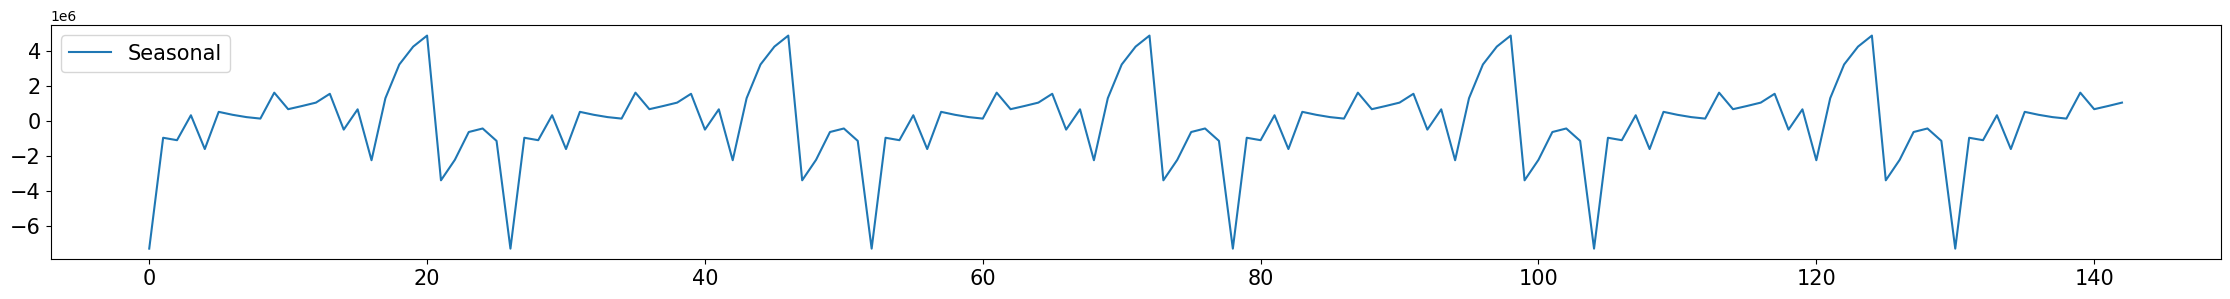

In [411]:
plt.figure(figsize=(28, 14))

plt.subplot(413)
plt.plot(decomposition.seasonal, label='Seasonal')

plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.legend(loc='upper left',fontsize=15)

In [412]:
# Get drops
all_troughs, _ = find_peaks(-decomposition.seasonal)

# Get drops values
troughs_values = decomposition.seasonal.iloc[all_troughs]

# Get drops indexes
n_top_troughs = 5
top_troughs = troughs_values.nsmallest(n_top_troughs).index

In [413]:
top_troughs

Index([26, 52, 78, 104, 130], dtype='int64')

In [414]:
sales_by_week.iloc[26]

Week            2019-08-06 00:00:00
Weekly_Sales            35793514.98
Name: 26, dtype: object

In [415]:
sales_by_week.iloc[52]

Week            2020-02-04 00:00:00
Weekly_Sales             29735945.0
Name: 52, dtype: object

In [416]:
sales_by_week.iloc[78]

Week            2020-08-05 00:00:00
Weekly_Sales            35315809.06
Name: 78, dtype: object

In [417]:
sales_by_week.iloc[104]

Week            2021-02-03 00:00:00
Weekly_Sales             4761935.53
Name: 104, dtype: object

- It seems that the beginning of August and the beginning of February are associated with significant drops. 

- The beginning of August corresponds to summer vacations, when regular consumers leave and spend elsewhere. 

- The beginning of February also corresponds to school holidays, which might similarly explain the drop.

## What are the drops we see on Residuality?

In [418]:
# Get drops
all_troughs, _ = find_peaks(-decomposition.resid)

# Get drops values
troughs_values = decomposition.resid.iloc[all_troughs]

# Get drops indexes
n_top_troughs = 5
top_troughs = troughs_values.nsmallest(n_top_troughs).index

In [419]:
top_troughs

Index([94, 104, 99, 51, 106], dtype='int64')

In [420]:
sales_by_week.iloc[94]

Week            2020-11-25 00:00:00
Weekly_Sales             8755282.84
Name: 94, dtype: object

In [421]:
sales_by_week.iloc[104]

Week            2021-02-03 00:00:00
Weekly_Sales             4761935.53
Name: 104, dtype: object

In [422]:
sales_by_week.iloc[99]

Week            2020-12-30 00:00:00
Weekly_Sales             11662898.3
Name: 99, dtype: object

It's hard to estimate the event that could be responsible here.

This period corresponds to the second lockdown in the UK, and many different occurrences could have affected thee sales.m

## Is the data Stationary?

Let's use the Dickey-Full Test to check.

In [423]:
print('Results of Augmented Dickey-Fuller Test:')
adf_result = adfuller(sales_by_week['Weekly_Sales'])

adf_output = pd.Series(adf_result[0:4], index=['Test Statistic', 'p-value', '# Lags Used', '# Observations Used'])

for key, value in adf_result[4].items():
    adf_output['Critical Value (%s)' % key] = value

print(adf_output)

Results of Augmented Dickey-Fuller Test:
Test Statistic           -3.395240
p-value                   0.011122
# Lags Used               5.000000
# Observations Used     137.000000
Critical Value (1%)      -3.479007
Critical Value (5%)      -2.882878
Critical Value (10%)     -2.578149
dtype: float64


p-value>0.05, meaning we cannot reject the null hypothesis, also meaning the data is non-stationary.

When we computed the difference of sales week after week, the data looked more stationary and stable.

Let's check it with the same test.

In [424]:
weekly_sales_evolution = pd.DataFrame(weekly_sales_evolution).reset_index().dropna()

In [425]:
weekly_sales_evolution

,Date,Weekly_Sales
1,2019-02-12,2287103.60
2,2019-02-19,124934.33
3,2019-02-26,-2468974.02
4,2019-03-05,814333.07
5,2019-03-12,90558.28
...,...,...
138,2021-09-28,-741693.79
139,2021-10-05,1830763.46
140,2021-10-12,192354.45
141,2021-10-19,-71424.70


In [426]:
print('Results of Augmented Dickey-Fuller Test:')
adf_result = adfuller(weekly_sales_evolution['Weekly_Sales'])

adf_output = pd.Series(adf_result[0:4], index=['Test Statistic', 'p-value', '# Lags Used', '# Observations Used'])

for key, value in adf_result[4].items():
    adf_output['Critical Value (%s)' % key] = value

print(adf_output)

Results of Augmented Dickey-Fuller Test:
Test Statistic         -1.205215e+01
p-value                 2.582491e-22
# Lags Used             3.000000e+00
# Observations Used     1.380000e+02
Critical Value (1%)    -3.478648e+00
Critical Value (5%)    -2.882722e+00
Critical Value (10%)   -2.578065e+00
dtype: float64


p-value<0.05, meaning we can reject the null hypothesis saying the data is non-stationary.